In [1]:
import numpy as np
import healpy as hp
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.plots as plots
import rubin_sim.maf.maps as maps
import rubin_sim.maf.metricBundles as mb
import rubin_sim.maf as maf


In [2]:
bundleList = []

sne_nside = 16
sn_summary = [
    metrics.MedianMetric(),
    metrics.MeanMetric(),
    metrics.SumMetric(metricName="Total detected"),
    metrics.CountMetric(metricName="Total on sky", maskVal=0),
]
slicer = slicers.HealpixSlicer(nside=sne_nside, useCache=False)
metric = metrics.SNNSNMetric(verbose=False, metricName='SNe_default')  # zlim_coeff=0.98)
bundle = mb.MetricBundle(
    metric,
    slicer,
    "",
    summaryMetrics=sn_summary,
)

bundleList.append(bundle)


metric = metrics.SNNSNMetric(verbose=False, metricName='SNe_params', n_bef=3, n_aft=8)  # zlim_coeff=0.98)
bundle = mb.MetricBundle(
    metric,
    slicer,
    "",
    summaryMetrics=sn_summary,
)

bundleList.append(bundle)



Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 54522 699 78
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 63609 699 91
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading

Querying table None with no constraint for columns ['observationStartMJD', 'observationId', 'fieldDec', 'rotSkyPos', 'fiveSigmaDepth', 'night', 'fieldRA', 'visitTime', 'visitExposureTime', 'numExposures', 'filter'].
Found 2078065 visits
Running:  ['opsim_SNe_default_HEAL', 'opsim_SNe_params_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 16 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:584: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


Plotting complete.


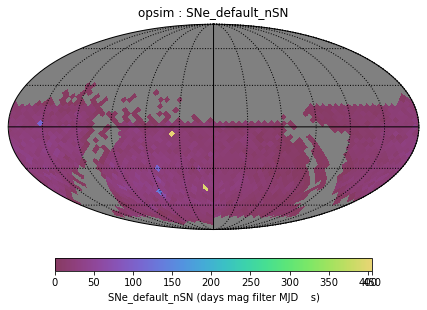

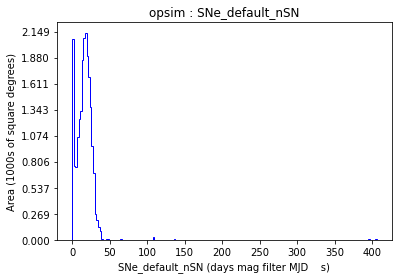

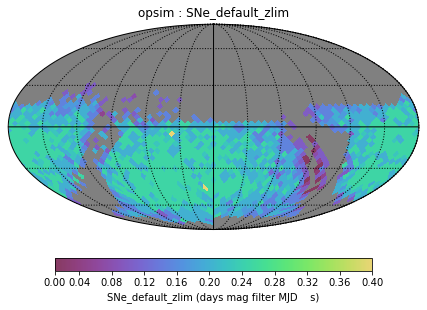

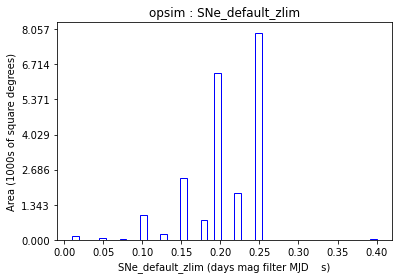

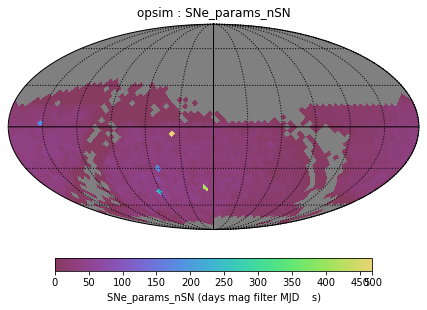

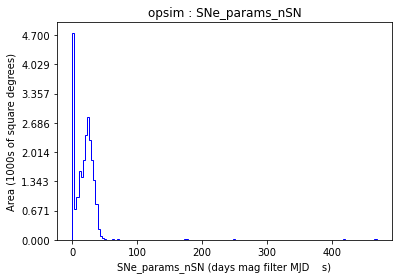

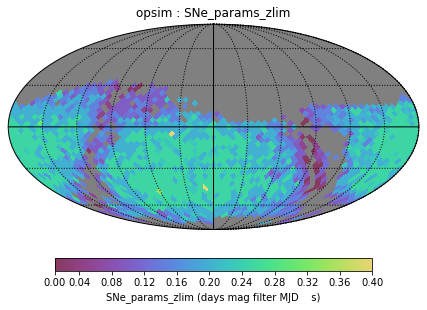

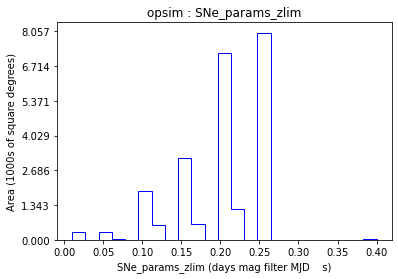

In [3]:
outDir='temp'
resultsDb = maf.db.ResultsDb(outDir=outDir)

bg = maf.metricBundles.MetricBundleGroup(bundleList, 'baseline_v2.2_10yrs.db', outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)


In [8]:
bg.bundleDict

{'opsim_SNe_default_HEAL': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fc4820b2d00>,
 'opsim_SNe_params_HEAL': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fc48207b220>,
 'SNe_default_nSN': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fc44e093b20>,
 'SNe_default_zlim': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fc42fc286d0>,
 'SNe_params_nSN': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fc42fc4c0d0>,
 'SNe_params_zlim': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fc42fc4c400>}

In [9]:
for key in bg.bundleDict:
    print(key, bg.bundleDict[key].summaryValues)

opsim_SNe_default_HEAL {}
opsim_SNe_params_HEAL {}
SNe_default_nSN {'Median': 16.335, 'Mean': 16.382548638132295, 'Total detected': 25261.89, 'Total on sky': 3072}
SNe_default_zlim {'Median': 0.2, 'Mean': 0.20733787289234762, 'Total detected': 319.71500000000003, 'Total on sky': 3072}
SNe_params_nSN {'Median': 19.997999999999998, 'Mean': 18.921005172413793, 'Total detected': 32922.549, 'Total on sky': 3072}
SNe_params_zlim {'Median': 0.2, 'Mean': 0.1967931034482759, 'Total detected': 342.4200000000001, 'Total on sky': 3072}
